In [11]:
T = int(input())
for _ in range(T):
    K = int(input())
    FileSizeList = list(map(int, input().split()))
#1 21 3 4 5 35 5 4 3 5 98 21 14 17 32

1
15
1 21 3 4 5 35 5 4 3 5 98 21 14 17 32


In [13]:
def sol(K, FileSizeList):
    
    AccSum = makeAccSum(K, FileSizeList)
    print(AccSum)
    make_dp(K, FileSizeList, AccSum)

def makeAccSum(K, FIleSizeList):
    AccSum = [0] * (K+1)
    AccSum[0] = FileSizeList[0]
    for n in range(1, K):
        AccSum[n] = AccSum[n-1] + FileSizeList[n]
    return AccSum

def make_dp(K, FileSizeList, AccSum):
    dp = [[0] * K for _ in range(K)]
    for x in range(K): # x번째 step입니다.
        for jj in range(x):
            for ii in range(jj, x): #x-1, ii-1 ,
                ## ii ~ jj - 1 그리고 ii~ x
                A = dp[ii][jj-1]
                B = dp[jj][x-1]
                next = A + B + AccSum[x] - AccSum[ii-1]
                print(ii , jj, x)
                print(A,B,AccSum[x] - AccSum[ii-1])
                print()
                #print(next)
                if dp[ii][x] == 0:
                    dp[ii][x] = next
                else:
                    dp[ii][x] = min(dp[ii][x], next)
    print(dp)

sol(K, FileSizeList)

[1, 22, 25, 29, 34, 69, 74, 78, 81, 86, 184, 205, 219, 236, 268, 0]
0 0 1
0 0 22

0 0 2
0 22 25

1 0 2
0 22 24

1 1 2
0 0 24

0 0 3
0 47 29

1 0 3
0 47 28

2 0 3
0 47 7

1 1 3
0 24 28

2 1 3
0 24 7

2 2 3
0 0 7

0 0 4
0 76 34

1 0 4
0 76 33

2 0 4
0 76 12

3 0 4
0 76 9

1 1 4
0 52 33

2 1 4
0 52 12

3 1 4
0 52 9

2 2 4
0 7 12

3 2 4
0 7 9

3 3 4
0 0 9

0 0 5
0 110 69

1 0 5
0 110 68

2 0 5
0 110 47

3 0 5
0 110 44

4 0 5
0 110 40

1 1 5
0 85 68

2 1 5
0 85 47

3 1 5
0 85 44

4 1 5
0 85 40

2 2 5
0 19 47

3 2 5
0 19 44

4 2 5
0 19 40

3 3 5
0 9 44

4 3 5
0 9 40

4 4 5
0 0 40

0 0 6
0 179 74

1 0 6
0 179 73

2 0 6
0 179 52

3 0 6
0 179 49

4 0 6
0 179 45

5 0 6
0 179 40

1 1 6
0 153 73

2 1 6
0 153 52

3 1 6
0 153 49

4 1 6
0 153 45

5 1 6
0 153 40

2 2 6
0 66 52

3 2 6
0 66 49

4 2 6
0 66 45

5 2 6
0 66 40

3 3 6
0 53 49

4 3 6
0 53 45

5 3 6
0 53 40

4 4 6
0 40 45

5 4 6
0 40 40

5 5 6
0 0 40

0 0 7
0 253 78

1 0 7
0 253 77

2 0 7
0 253 56

3 0 7
0 253 53

4 0 7
0 253 49

5 0 7
0 253 4

In [5]:
for _ in range(int(input())):
    K = int(input())
    files = [*map(int, input().split())]
    minCost = [[0]*K for _ in range(K)] # 메모이제이션 리스트
    
    # 연속합 (a부터 b까지의 부분연속합을 구할 때, b까지합 - (a-1)까지합 으로 구해주면 됨)
    # 여러번 sum함수 안써도 되고, 딕셔너리 구해두면 O(1) 연산으로 그때그때 부분합 구해서 쓰는게 효율적
    subSum = {-1: 0}
    for idx in range(K):
        subSum[idx] = subSum[idx-1] + files[idx]
    
    
    for size in range(1, K): # size 크기로 묶은 그룹들의 minCost 구하기
        for start in range(K-1): # 그룹의 시작 인덱스 범위는 0부터 K-2까지
            end = start + size
            
            # 특정 size로 그룹핑했는데 end가 벗어난다면 size 그룹핑 그만두고 다음으로 넘어가기
            if end >= len(files):
                break
            
            result = float("inf")
            # 어떤 구간의 최소비용 minCost는, cut을 기준으로 분할할 때, 좌측 그룹의 최소 비용 + 우측 그룹의 최소 비용 + 좌측 압축 수와 우측 압축 수 더하기
            # 이 때 좌측 압축 수 + 우측 압축 수는 그 구간의 모든 수의 합과 같음
            for cut in range(start, end):
                result = min(result, minCost[start][cut] + minCost[cut+1][end] + subSum[end] - subSum[start-1])
            
            minCost[start][end] = result
    print(subSum)
    print(minCost)

    print(minCost[0][-1])


1
15
1 21 3 4 5 35 5 4 3 5 98 21 14 17 32
{-1: 0, 0: 1, 1: 22, 2: 25, 3: 29, 4: 34, 5: 69, 6: 74, 7: 78, 8: 81, 9: 86, 10: 184, 11: 205, 12: 219, 13: 236, 14: 268}
[[0, 22, 47, 58, 75, 144, 189, 206, 222, 247, 431, 571, 634, 716, 864], [0, 0, 24, 35, 52, 120, 165, 182, 198, 223, 406, 546, 609, 691, 839], [0, 0, 0, 7, 19, 66, 111, 128, 144, 164, 326, 466, 529, 611, 739], [0, 0, 0, 0, 9, 53, 98, 115, 128, 148, 307, 447, 510, 592, 717], [0, 0, 0, 0, 0, 40, 85, 98, 111, 131, 286, 426, 489, 571, 692], [0, 0, 0, 0, 0, 0, 40, 53, 66, 86, 236, 376, 439, 521, 637], [0, 0, 0, 0, 0, 0, 0, 9, 19, 34, 149, 285, 334, 399, 515], [0, 0, 0, 0, 0, 0, 0, 0, 7, 19, 129, 260, 309, 374, 490], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 114, 241, 290, 355, 471], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 103, 227, 276, 341, 457], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 119, 168, 233, 349], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 83, 167], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 94], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49], [0,

In [ ]:
1[0][3]
ii = 0; x = 3

In [ ]:
30 30 40 50

In [ ]:
FileSizeList

[1, 21, 3, 4, 5, 35, 5, 4, 3, 5, 98, 21, 14, 17, 32]

In [ ]:
#30 30 40 50
0  60 100 
0  0  70  
0  0  0   

310

In [ ]:
1  2~3 
30 70       1, 170


1~2 3
60 40       160, 140

1~2~3
100         200 

In [ ]:
30 *2 + 40 * 2 + 30 * 2 + 50 * 2

300

In [ ]:
# 30 30 40 50
# 30 30 
# 60 60 40
# 90 90 80 50
# 3 3 2 1
# 60 60 80 50
# 2 2 2 2

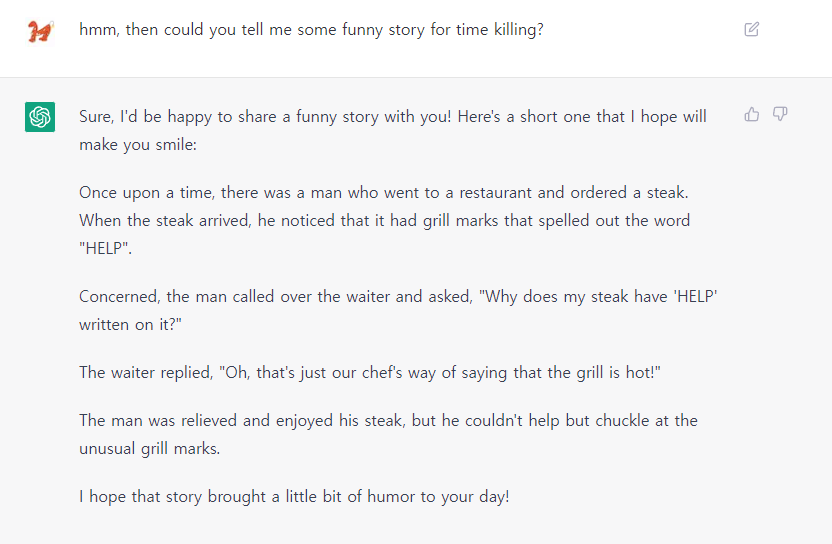